In [285]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import numpy as np

In [286]:
# LEITURA CSV
df = pd.read_csv('titanic-dataset.csv')

In [287]:
# EXCLUSÃO DE FEATURES DESNECESSÁRIAS
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# EXCLUSÃO DE NAN
df = df.dropna()

# LABEL ENCODER PARA SEXO
le = LabelEncoder()
df.Sex = le.fit(df.Sex).transform(df.Sex)

In [288]:
# SEPARAÇÃO X E Y
x = df.drop(['Survived'], axis=1)
y = df.Survived

# SPLIT TESTE E TREINO
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

### VISUALIZAÇÃO DE DADOS

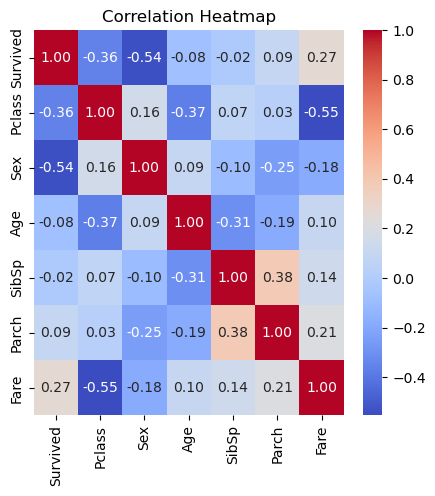

In [289]:
# HEATMAP
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

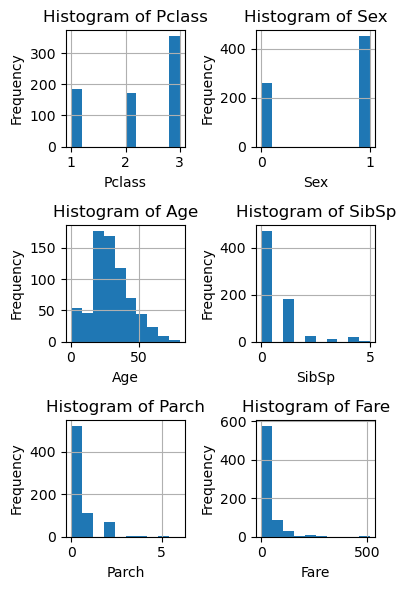

In [290]:
def histogram_features(dataset):
    # Determine the size of the grid
    num_cols = len(dataset.columns)
    num_rows = (num_cols + 1) // 2  # Round up if odd number of columns
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(4, num_rows * 2))  # Adjust figsize as needed
    
    # Flatten the axes array if there's only one row
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Plot histograms for each feature
    for i, column in enumerate(dataset.columns):
        ax = axes[i // 2, i % 2]  # Select the current subplot
        dataset[column].hist(ax=ax)
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(True)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()  

histogram_features(x)

### PRÉ-PROCESSAMENTO DE DADOS

In [291]:
def apply_transformation(x):
    x_transf = x.copy()
    scaler = MinMaxScaler()
    x_transf[['SibSp', 'Parch', 'Fare']] = scaler.fit_transform(x_transf[['SibSp', 'Parch', 'Fare']])
    scaler = StandardScaler()
    x_transf[['Age']] = scaler.fit_transform(x_transf[['Age']])
    return x_transf

     Pclass  Sex       Age  SibSp     Parch      Fare
830       3    0 -1.027500    0.2  0.000000  0.028213
565       3    1 -0.408083    0.4  0.000000  0.047138
148       2    1  0.452217    0.0  0.333333  0.050749
105       3    1 -0.132787    0.0  0.000000  0.015412
289       3    0 -0.545731    0.0  0.000000  0.015127


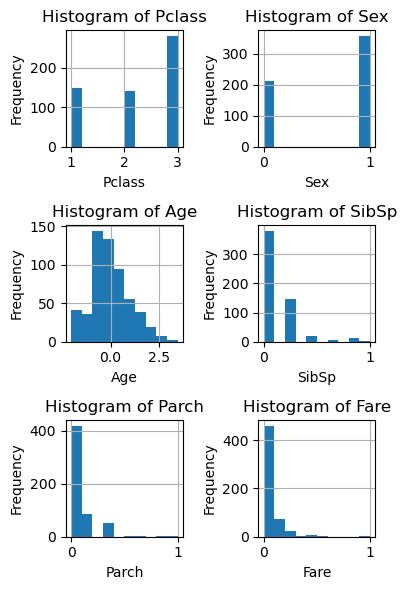

In [292]:
# TRANSFORMAR DADOS
x_train_transf = apply_transformation(x_train)

print(x_train_transf.head())
histogram_features(x_train_transf)

### CRIAÇÃO DO MODELO

In [293]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_transf, y_train)

x_test_transf = apply_transformation(x_test)
knn.score(x_test_transf, y_test)

0.8041958041958042

In [294]:
ks = range(1, 11)

list_results = list()

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(x_train_transf, y_train)
    score = knn.score(x_test_transf, y_test)

    results = {"k": k, "model": model, "score": score}
    list_results.append(results)

In [295]:
for result in list_results:
    print(result["k"], result["score"], result["model"])

1 0.6993006993006993 KNeighborsClassifier(n_neighbors=1)
2 0.8391608391608392 KNeighborsClassifier(n_neighbors=2)
3 0.8041958041958042 KNeighborsClassifier(n_neighbors=3)
4 0.8601398601398601 KNeighborsClassifier(n_neighbors=4)
5 0.8671328671328671 KNeighborsClassifier()
6 0.8461538461538461 KNeighborsClassifier(n_neighbors=6)
7 0.8531468531468531 KNeighborsClassifier(n_neighbors=7)
8 0.8531468531468531 KNeighborsClassifier(n_neighbors=8)
9 0.8531468531468531 KNeighborsClassifier(n_neighbors=9)
10 0.8461538461538461 KNeighborsClassifier(n_neighbors=10)
